<a href="https://colab.research.google.com/github/Monta243/Data-Science-and-Machine-Learning-Camp-Beginner-Level-/blob/main/Final_Project_for_Data_Science_and_Machine_Learning_Camp_(Beginner_Level).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Global Salary Data**
>> **Mountader Mohammed ALSinan (MIS Fresh Graduate)**

```
Global Salary Data: Monthly salaries, converted to USD, for 222 country.

The Source: ( https://www.kaggle.com/datasets/zedataweaver/global-salary-data ).
```

# Data Cleaning

In [216]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Read data from CSV file
data = pd.read_csv('/content/salary_data.csv')
data

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,Monthly,853.740000,1001.150000,252.530000,4460.970000
1,Aland Islands,Europe,Monthly,3319.240000,3858.350000,972.520000,17124.740000
2,Albania,Europe,Monthly,832.840000,956.920000,241.220000,4258.490000
3,Algeria,Africa,Monthly,1148.840000,1308.810000,330.110000,5824.180000
4,American Samoa,Oceania,Monthly,1390.000000,1570.000000,400.000000,6980.000000
...,...,...,...,...,...,...,...
216,Virgin Islands (US),North America,Monthly,2380.000000,2710.000000,680.000000,12000.000000
217,Western Sahara,Africa,Monthly,908.560000,1011.670000,254.860000,4503.890000
218,Yemen,Asia,Monthly,120.980000,133.360000,33.620000,594.930000
219,Zambia,Africa,Monthly,0.261335,0.285524,0.072092,1.271103


In [217]:
#Explore the data
data.head(13)

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,Monthly,853.74,1001.15,252.53,4460.97
1,Aland Islands,Europe,Monthly,3319.24,3858.35,972.52,17124.74
2,Albania,Europe,Monthly,832.84,956.92,241.22,4258.49
3,Algeria,Africa,Monthly,1148.84,1308.81,330.11,5824.18
4,American Samoa,Oceania,Monthly,1390.00,1570.00,400.00,6980.00
5,Andorra,Europe,Monthly,3668.08,4069.77,1120.51,17653.28
6,Angola,Africa,Monthly,284.39,314.39,79.32,1403.96
7,Antigua and Barbuda,Caribbean,Monthly,1548.15,1677.78,422.22,7444.44
8,Argentina,South America,Monthly,110.28,129.42,32.57,577.13
9,Armenia,Asia,Monthly,1700.25,1974.32,497.39,8780.39


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    221 non-null    object 
 1   continent_name  221 non-null    object 
 2   wage_span       221 non-null    object 
 3   median_salary   221 non-null    float64
 4   average_salary  221 non-null    float64
 5   lowest_salary   221 non-null    float64
 6   highest_salary  221 non-null    float64
dtypes: float64(4), object(3)
memory usage: 12.2+ KB


In [219]:
#The column
data.columns

Index(['country_name', 'continent_name', 'wage_span', 'median_salary',
       'average_salary', 'lowest_salary', 'highest_salary'],
      dtype='object')

In [220]:
#Check data types
data.dtypes

country_name       object
continent_name     object
wage_span          object
median_salary     float64
average_salary    float64
lowest_salary     float64
highest_salary    float64
dtype: object

In [221]:
#Check the null (missing values)
data.isnull().sum()

country_name      0
continent_name    0
wage_span         0
median_salary     0
average_salary    0
lowest_salary     0
highest_salary    0
dtype: int64

```
# No Massing Values

```

In [222]:
#Total of each culumn
data.sum()

country_name      AfghanistanAland IslandsAlbaniaAlgeriaAmerican...
continent_name    AsiaEuropeEuropeAfricaOceaniaEuropeAfricaCarib...
wage_span         MonthlyMonthlyMonthlyMonthlyMonthlyMonthlyMont...
median_salary                                         389541.651158
average_salary                                        438097.098541
lowest_salary                                          111115.08809
highest_salary                                       1945278.601783
dtype: object

In [223]:
#Max value
data.average_salary.max()

11292.9

In [224]:
#Check for duplicate rows
data.duplicated().sum()

0

In [225]:
#Check for outliers (Five point summury)
data.describe()

,median_salary,average_salary,lowest_salary,highest_salary
count,221.000000,221.000000,221.000000,221.000000
mean,1762.631906,1982.339812,502.783204,8802.165619
std,1634.708716,1835.429193,470.073328,8140.210641
min,0.261335,0.285524,0.072092,1.271103
25%,567.210000,651.000000,163.930000,2900.480000
50%,1227.460000,1344.230000,339.450000,5974.360000
75%,2389.010000,2740.000000,690.000000,12050.740000
max,9836.070000,11292.900000,2850.270000,50363.930000


# Data Processing

### Normalization

In [226]:
# Normalization using StandardScaler
dataProcess = data
columnsToNormalize = ['median_salary','average_salary','lowest_salary','highest_salary']
scaler = StandardScaler()
dataProcess[columnsToNormalize] = scaler.fit_transform(dataProcess[columnsToNormalize])
dataProcess

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,Monthly,-0.557258,-0.535797,-0.533579,-0.534513
1,Aland Islands,Europe,Monthly,0.954385,1.024430,1.001553,1.024724
2,Albania,Europe,Monthly,-0.570073,-0.559950,-0.557694,-0.559444
3,Algeria,Africa,Monthly,-0.376327,-0.367793,-0.368166,-0.366667
4,American Samoa,Oceania,Monthly,-0.228468,-0.225166,-0.219150,-0.224356
...,...,...,...,...,...,...,...
216,Virgin Islands (US),North America,Monthly,0.378520,0.397352,0.377854,0.393736
217,Western Sahara,Africa,Monthly,-0.523647,-0.530052,-0.528611,-0.529229
218,Yemen,Asia,Monthly,-1.006527,-1.009670,-1.000330,-1.010523
219,Zambia,Africa,Monthly,-1.080542,-1.082338,-1.071859,-1.083617


In [227]:
#Scaling to a specific range [0, 1] using MinMaxScaler
min_max_scaler = MinMaxScaler()
dataProcess[columnsToNormalize] = min_max_scaler.fit_transform(dataProcess[columnsToNormalize])
dataProcess

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,Monthly,0.086773,0.088630,0.088576,0.088552
1,Aland Islands,Europe,Monthly,0.337438,0.341645,0.341186,0.340003
2,Albania,Europe,Monthly,0.084648,0.084713,0.084607,0.084531
3,Algeria,Africa,Monthly,0.116775,0.115874,0.115795,0.115620
4,American Samoa,Oceania,Monthly,0.141294,0.139004,0.140316,0.138570
...,...,...,...,...,...,...,...
216,Virgin Islands (US),North America,Monthly,0.241946,0.239955,0.238555,0.238247
217,Western Sahara,Africa,Monthly,0.092346,0.089562,0.089393,0.089404
218,Yemen,Asia,Monthly,0.012273,0.011784,0.011770,0.011788
219,Zambia,Africa,Monthly,0.000000,0.000000,0.000000,0.000000


In [228]:
#Drop the [country_name and wage_span] columns
data.drop(['country_name', 'wage_span','median_salary'], axis=1, inplace = True)

In [229]:
data.dtypes

continent_name     object
average_salary    float64
lowest_salary     float64
highest_salary    float64
dtype: object

In [230]:
dataProcess.head()

,continent_name,average_salary,lowest_salary,highest_salary
0,Asia,0.088630,0.088576,0.088552
1,Europe,0.341645,0.341186,0.340003
2,Europe,0.084713,0.084607,0.084531
3,Africa,0.115874,0.115795,0.115620
4,Oceania,0.139004,0.140316,0.138570


In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

Original DataFrame:
    continent_name  average_salary  lowest_salary  highest_salary
0             Asia        0.088630       0.088576        0.088552
1           Europe        0.341645       0.341186        0.340003
2           Europe        0.084713       0.084607        0.084531
3           Africa        0.115874       0.115795        0.115620
4          Oceania        0.139004       0.140316        0.138570
..             ...             ...            ...             ...
216  North America        0.239955       0.238555        0.238247
217         Africa        0.089562       0.089393        0.089404
218           Asia        0.011784       0.011770        0.011788
219         Africa        0.000000       0.000000        0.000000
220         Africa        0.053317       0.053102        0.053085

[221 rows x 4 columns]


### Save the Processed Dataset

In [232]:
# Save the cleaned dataset to the new CSV file.
data.to_csv('cleaned_salary_data.csv', index=False)

# Data Visualization

### Descriptive Statistics

In [233]:
# Sort max Values

import pandas as pd

df = pd.DataFrame(data)

sorted_df = df.sort_values(by='highest_salary', ascending=False)

print(sorted_df)

       continent_name  average_salary  lowest_salary  highest_salary
192            Europe        1.000000       1.000000        1.000000
83             Europe        0.833241       0.830468        0.831335
209  Northern America        0.701761       0.701680        0.699898
35   Northern America        0.651103       0.649052        0.649674
208            Europe        0.640692       0.641779        0.639628
..                ...             ...            ...             ...
211              Asia        0.009448       0.009472        0.009453
188            Africa        0.006575       0.006571        0.006565
127            Africa        0.004624       0.004607        0.004598
193              Asia        0.000994       0.000992        0.000991
219            Africa        0.000000       0.000000        0.000000

[221 rows x 4 columns]


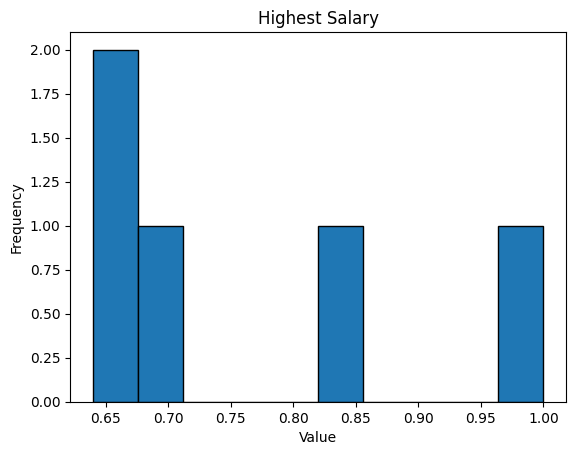

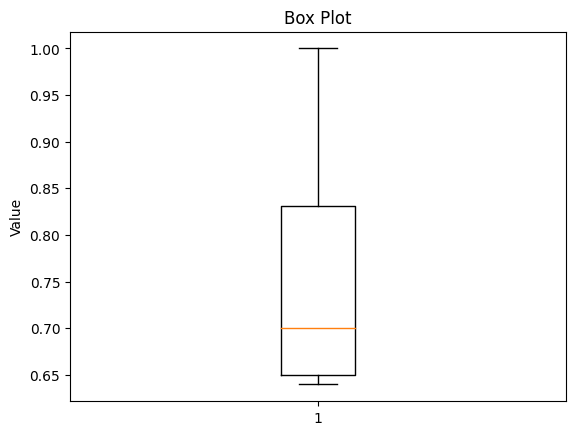

Mean: 0.7641070000000001
Median: 0.699898
Mode: 0
Variance: 0.018575568008800003
Standard Deviation: 0.13629221551064463
Skewness: 0.7693007702517421
Kurtosis: -0.9449926581217758
25th Percentile (Q1): 0.649674
50th Percentile (Q2/Median): 0.699898
75th Percentile (Q3): 0.831335
100th Percentile (Q4): 1.0


In [234]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

HS = [1.000000, 0.831335, 0.699898, 0.649674, 0.639628]

mean = np.mean(HS)
median = np.median(HS)
mode = np.argmax(np.bincount(HS))
variance = np.var(HS)
std_dev = np.std(HS)
skewness = skew(HS)
kurt = kurtosis(HS)
quantiles = np.percentile(HS, [25, 50, 75, 100])

plt.hist(HS, bins=10, edgecolor='black')
plt.title('Highest Salary')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

plt.boxplot(HS)
plt.title('Box Plot')
plt.ylabel('Value')
plt.show()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")
print(f"25th Percentile (Q1): {quantiles[0]}")
print(f"50th Percentile (Q2/Median): {quantiles[1]}")
print(f"75th Percentile (Q3): {quantiles[2]}")
print(f"100th Percentile (Q4): {quantiles[3]}")

## Scatter Plot

Text(0.5, 1.02, 'Scatterplot of seeds features by Continent Name')

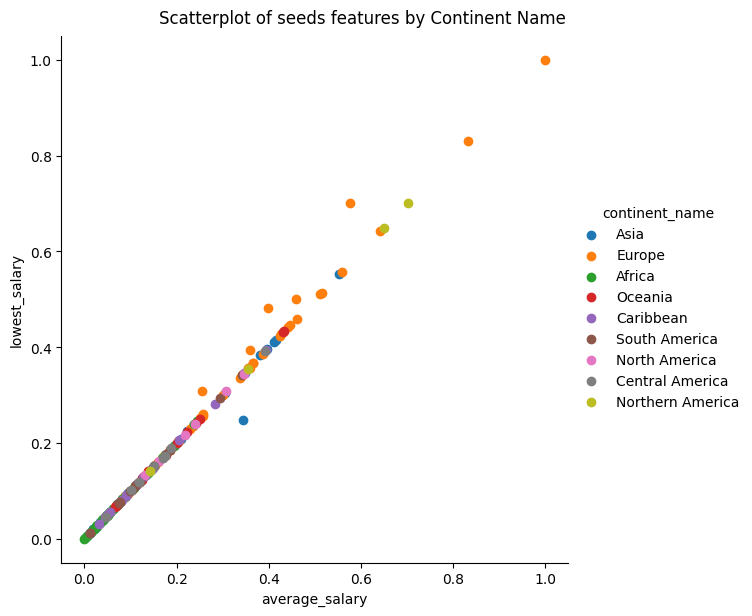

In [235]:
sns.FacetGrid(data, hue ="continent_name", height = 6).map(plt.scatter, 'average_salary' ,'lowest_salary').add_legend()
plt.suptitle("Scatterplot of seeds features by Continent Name", y=1.02)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning:


The markers list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning:


The markers list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning:


The markers list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning:


The markers list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning:


The markers list has fewer values (3) than needed (9) and will cycle, which may produce an uninterpretable plot.

/usr/local/lib/python3.10

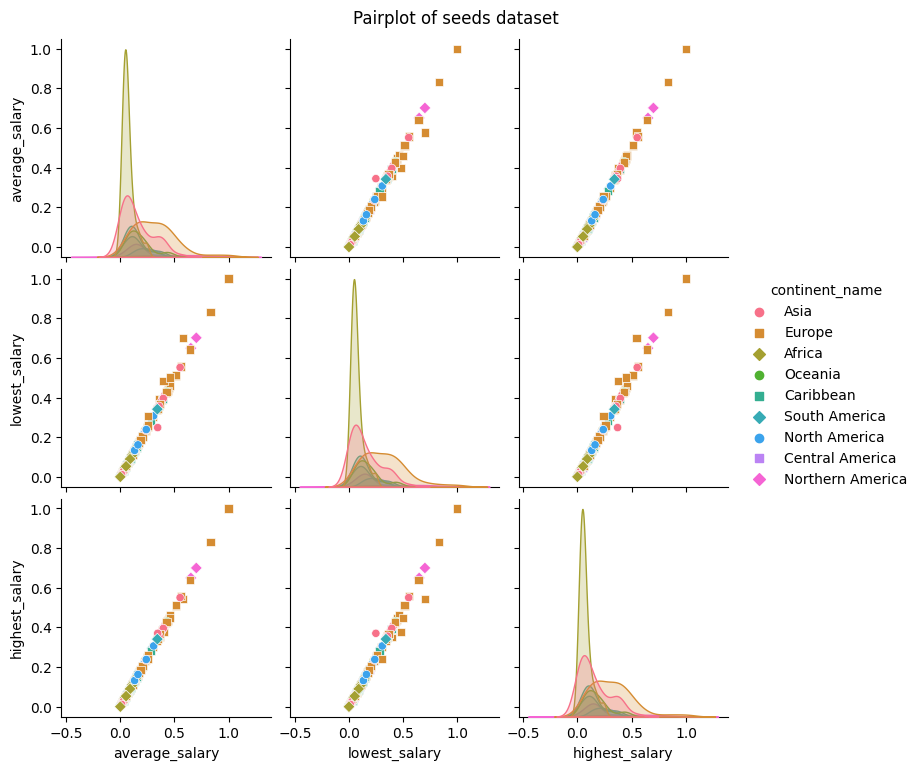

In [236]:
# Pairplot: Scatterplot Matrix
sns.pairplot(data, hue="continent_name", palette="husl", markers=["o", "s", "D"])
plt.suptitle("Pairplot of seeds dataset", y=1.02)
plt.show()

## Interactive Scatter Plot

In [237]:
# Interactive plot using Plotly
fig = px.scatter(df, x='highest_salary', y='average_salary', size='average_salary', color='continent_name',
                 hover_name='continent_name', log_x=True, size_max=60)
fig.update_layout(title='Interactive Scatter Plot: Highest Salary, Average Salary, Continent Name',
                  xaxis_title='highest_salary',
                  yaxis_title='average_salary',
                  coloraxis_colorbar_title='continent_name')
fig.show()

## Box Plot

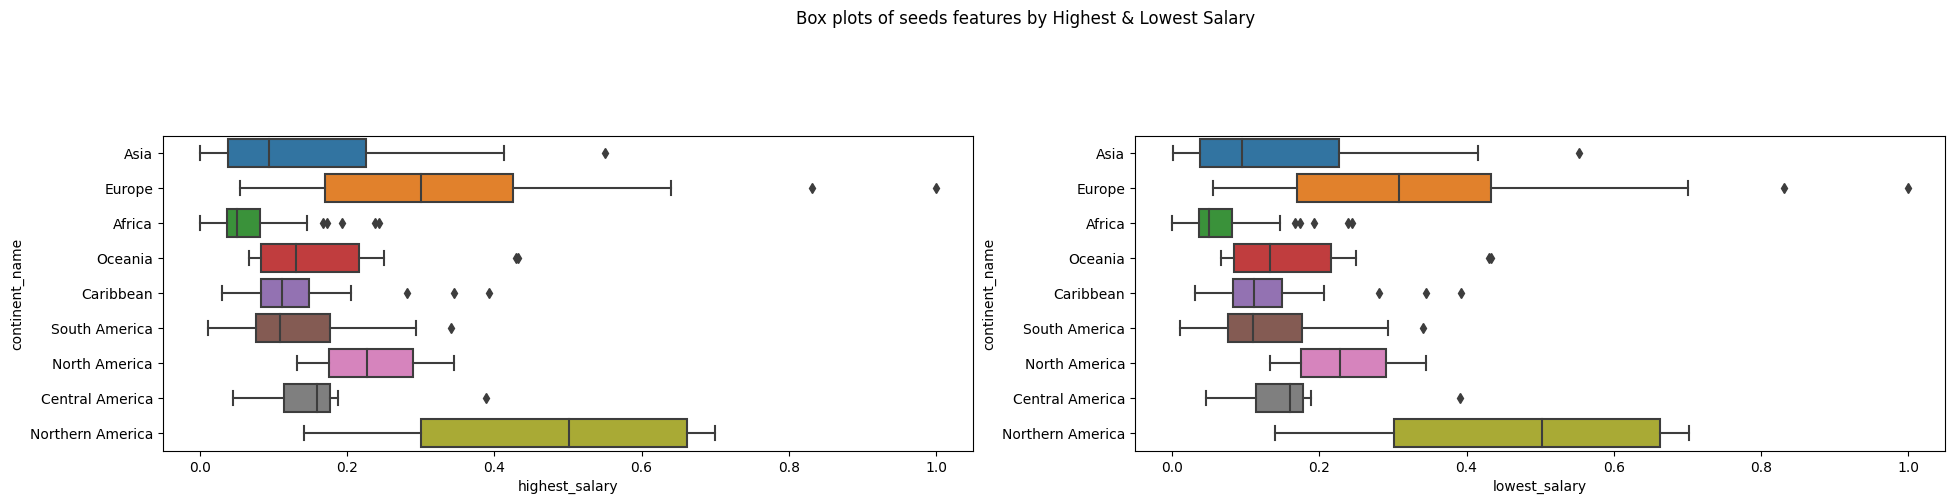

In [238]:
plt.figure(figsize=(23,9))
plt.subplot(2, 2, 1)
sns.boxplot(x="highest_salary", y="continent_name", data=data)
plt.subplot(2, 2, 2)
sns.boxplot(x="lowest_salary", y="continent_name", data=data)
plt.suptitle("Box plots of seeds features by Highest & Lowest Salary", y=1.02)
plt.show()

## Violin Plot

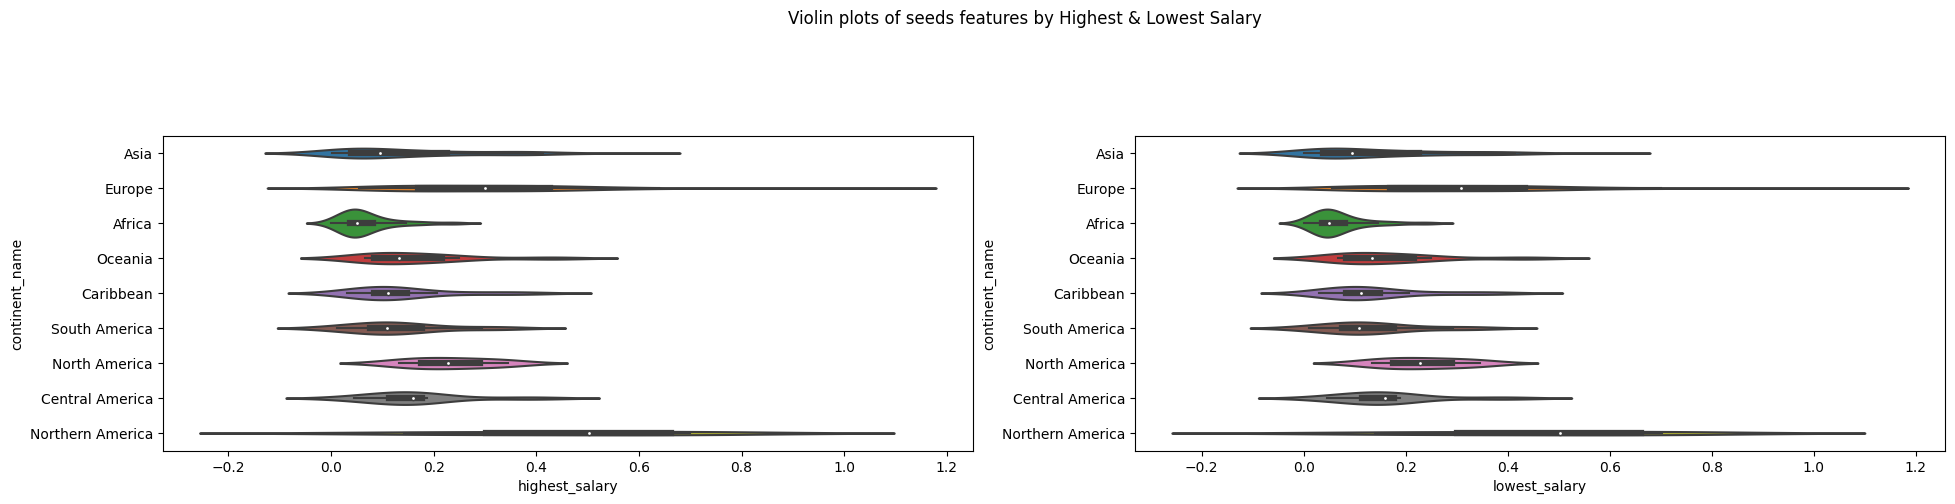

In [239]:
plt.figure(figsize=(23,9))
plt.subplot(2, 2, 1)
sns.violinplot(x="highest_salary", y="continent_name", data=data)
plt.subplot(2, 2, 2)
sns.violinplot(x="lowest_salary", y="continent_name", data=data)
plt.suptitle("Violin plots of seeds features by Highest & Lowest Salary", y=1.02)
plt.show()

## Machine Learning (ML) Algorithms

In [240]:
df = pd.read_csv('/content/cleaned_salary_data.csv')
df

,continent_name,average_salary,lowest_salary,highest_salary
0,Asia,0.088630,0.088576,0.088552
1,Europe,0.341645,0.341186,0.340003
2,Europe,0.084713,0.084607,0.084531
3,Africa,0.115874,0.115795,0.115620
4,Oceania,0.139004,0.140316,0.138570
...,...,...,...,...
216,North America,0.239955,0.238555,0.238247
217,Africa,0.089562,0.089393,0.089404
218,Asia,0.011784,0.011770,0.011788
219,Africa,0.000000,0.000000,0.000000


In [241]:
y = df['average_salary'] # target
X = df.drop(['average_salary','continent_name','lowest_salary'] , axis = 1 )
X

,highest_salary
0,0.088552
1,0.340003
2,0.084531
3,0.115620
4,0.138570
...,...
216,0.238247
217,0.089404
218,0.011788
219,0.000000


### Linear Regression

In [242]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 0.000572586147168632
Mean Squared Error: 2.2759845347818194e-06
R-squared: 0.9999201107726365


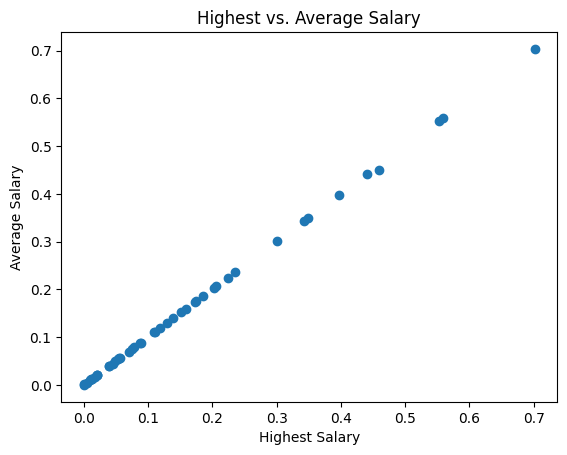

Linear Regression R^2 : 0.9999201107726365


In [243]:
# Plot the Highest vs. Average values
plt.scatter(y_test, predictions)
plt.xlabel('Highest Salary')
plt.ylabel('Average Salary')
plt.title('Highest vs. Average Salary')
plt.show()
lr.fit(X_train , y_train)
print(f"Linear Regression R^2 : {lr.score(X_test , y_test)}")

### Logistic Regression

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load iris dataset (example dataset for classification)
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model with increased max_iter and a solver
logistic_model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Fit the model on the scaled training data
logistic_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
predictions = logistic_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R-squared: 1.0
Accuracy: 1.0


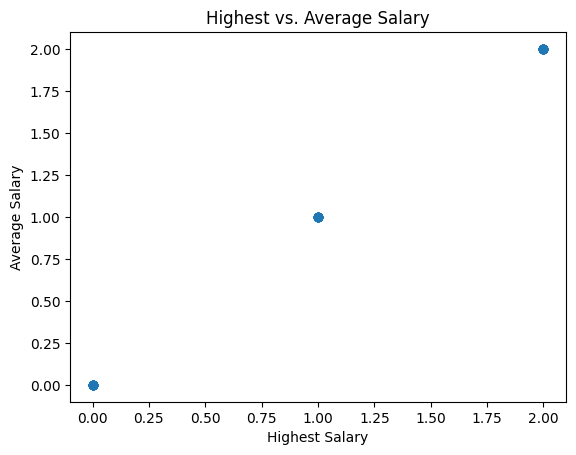

Logistic Regression R^2 : 0.9468960016420045


In [245]:
# Plot the Highest vs. Average values
plt.scatter(y_test, predictions)
plt.xlabel('Highest Salary')
plt.ylabel('Average Salary')
plt.title('Highest vs. Average Salary')
plt.show()
lr.fit(X_train , y_train)
print(f"Logistic Regression R^2 : {lr.score(X_test , y_test)}")

# Final  Result

In [251]:
model_dic={
    "LinearRegression":LinearRegression(),
    "LogisticRegression":LogisticRegression(),
}

for model_n in model_dic.keys():
    model=model_dic[model_n]
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    print("======")
    print("Model:", model_n)
    print("Score:", score)
    print("train Score:", model.score(X_train,y_train))
    model.predict(X_test)



Model: LinearRegression
Score: 0.9468960016420045
train Score: 0.9254199044989622
Model: LogisticRegression
Score: 1.0
train Score: 0.975


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

